# Billboard (1965 - 2015) Content and Sentiment Analysis

In [1]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')

In [2]:
import sqlite3
import pandas as pd
import matplotlib
import urllib
import lxml.html
import urllib.parse
from lxml.html import tostring, html5parser
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier



In [3]:
Pd_song_read= pd.read_csv('finalfinal.csv')
#Pd_song_read= pd.read_csv('billboard_lyrics_1964-2015.csv',sep=',',quotechar='"',encoding='latin-1')

In [4]:
Pd_song_read

Song  \
0                                  wooly bully   
1     i cant help myself sugar pie honey bunch   
2                   i cant get no satisfaction   
3                          you were on my mind   
4                 youve lost that lovin feelin   
5                                     downtown   
6                                         help   
7                  cant you hear my heart beat   
8                         crying in the chapel   
9                                      my girl   
10                              help me rhonda   
11                            king of the road   
12                      the birds and the bees   
13                   hold me thrill me kiss me   
14                                     shotgun   
15                              i got you babe   
16                           this diamond ring   
17                                the in crowd   
18       mrs brown youve got a lovely daughter   
19                    stop in the name of love   
20                            unchained melody   
21                                 silhouettes   
22                  ill never find another you   
23                                    cara mia   
24                           mr tambourine man   
25                  cast your fate to the wind   
26                                yes im ready   
27                          whats new pussycat   
28                          eve of destruction   
29                              hang on sloopy   
...                                        ...   
5070                                   riptide   
5071                               classic man   
5072                                  exs  ohs   
5073                       dear future husband   
5074                               marvin gaye   
5075                    like im gonna lose you   
5076                          habits stay high   
5077                          the hanging tree   
5078                                      coco   
5079                                 bang bang   
5080                               lay me down   
5081                                   tuesday   
5082                              hit the quan   
5083                                  downtown   
5084                               house party   
5085                                       ayo   
5086                          kick the dust up   
5087                                 blessings   
5088                                  budapest   
5089                                chandelier   
5090                            heartbeat song   
5091                                      dont   
5092                                     ghost   
5093                                      here   
5094                                     waves   
5095                                 el perdon   
5096                                 she knows   
5097                             night changes   
5098                              back to back   
5099                     how deep is your love   

                                                 Artist  Year  \
0                         sam the sham and the pharaohs  1965   
1                                             four tops  1965   
2                                    the rolling stones  1965   
3                                               we five  1965   
4                                the righteous brothers  1965   
5                                          petula clark  1965   
6                                           the beatles  1965   
7                                       hermans hermits  1965   
8                                         elvis presley  1965   
9                                       the temptations  1965   
10                                       the beach boys  1965   
11                                         roger miller  1965   
12                                          jewel akens  1965   
13                             

In [5]:
Pd_song_read['Lyrics'] = Pd_song_read['Lyrics'].astype('str') 

In [6]:
#removing extra characters from the lyrics 
Pd_song_read['Lyrics'] = [x.strip('.') for x in Pd_song_read['Lyrics']]
#dropping records having no lyrics
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics']!='  ']
#dropping songs that do not have lyrics and replaced with nan
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics'] != 'nan']

In [7]:
#tokenizing the lyrics
def identify_tokens(row):
    Lyrics = row['Lyrics']
    tokens = nltk.word_tokenize(Lyrics)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

Pd_song_read['lr'] = Pd_song_read.apply(identify_tokens, axis=1)
#Removing Stop Words
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['lr']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

Pd_song_read['stopword_lyrc'] = Pd_song_read.apply(remove_stops, axis=1)

In [8]:
Pd_song_read.head(3)

Song                         Artist  \
0                               wooly bully  sam the sham and the pharaohs   
1  i cant help myself sugar pie honey bunch                      four tops   
2                i cant get no satisfaction             the rolling stones   

   Year                                             Lyrics  \
0  1965  uno dos one two tres quatro matty told hatty a...   
1  1965   sugar pie honey bunch you know that i love yo...   
2  1965  I can't get no satisfaction, I can't get no sa...   

                                                  lr  \
0  [uno, dos, one, two, tres, quatro, matty, told...   
1  [sugar, pie, honey, bunch, you, know, that, i,...   
2  [I, ca, get, no, satisfaction, I, ca, get, no,...   

                                       stopword_lyrc  
0  [uno, dos, one, two, tres, quatro, matty, told...  
1  [sugar, pie, honey, bunch, know, love, cant, h...  
2  [I, ca, get, satisfaction, I, ca, get, satisfa...

In [9]:
#function for finding length of songs 

In [10]:
#import pandas as pd
#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.figsize'] = (8,6)

#dfr = pd.DataFrame(columns=('artist', 'words'))
#i=0
#for artist in Pd_song_read.Artist:
#    f = Pd_song_read.stopword_lyrc
#    num_words = 0
#    all_text = ''
#    for sentence in f:
#        #this_sentence = sentence.decode('utf-8')
#        num_words_this = len(sentence)
#        num_words += num_words_this


In [11]:
#Removing stopwords from the Lyrics

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (80,60)

dfr = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in Pd_song_read.Artist:
    f = Pd_song_read.stopword_lyrc
    num_words = []
    all_text = ''
    for sentence in f:
        this_sentence = sentence
        num_words_this = len(this_sentence)
        num_words.append(num_words_this) 
     
    dfr.loc[i] = (artist)
    i+=1

In [13]:
dataframe=pd.DataFrame(Pd_song_read)
dataframe.insert(6,"Word_Count",num_words, True)
#dataframe.insert(7,"Word_Count",num_words, True)
dataframe

Song  \
0                                  wooly bully   
1     i cant help myself sugar pie honey bunch   
2                   i cant get no satisfaction   
3                          you were on my mind   
4                 youve lost that lovin feelin   
5                                     downtown   
6                                         help   
7                  cant you hear my heart beat   
8                         crying in the chapel   
9                                      my girl   
10                              help me rhonda   
11                            king of the road   
12                      the birds and the bees   
13                   hold me thrill me kiss me   
14                                     shotgun   
15                              i got you babe   
16                           this diamond ring   
17                                the in crowd   
18       mrs brown youve got a lovely daughter   
19                    stop in the name of love   
20                            unchained melody   
21                                 silhouettes   
22                  ill never find another you   
23                                    cara mia   
24                           mr tambourine man   
25                  cast your fate to the wind   
26                                yes im ready   
27                          whats new pussycat   
28                          eve of destruction   
29                              hang on sloopy   
...                                        ...   
5069                                   no type   
5070                                   riptide   
5071                               classic man   
5072                                  exs  ohs   
5073                       dear future husband   
5074                               marvin gaye   
5075                    like im gonna lose you   
5076                          habits stay high   
5077                          the hanging tree   
5078                                      coco   
5079                                 bang bang   
5080                               lay me down   
5081                                   tuesday   
5082                              hit the quan   
5083                                  downtown   
5084                               house party   
5085                                       ayo   
5086                          kick the dust up   
5087                                 blessings   
5088                                  budapest   
5089                                chandelier   
5090                            heartbeat song   
5091                                      dont   
5092                                     ghost   
5093                                      here   
5094                                     waves   
5095                                 el perdon   
5097                             night changes   
5098                              back to back   
5099                     how deep is your love   

                                                 Artist  Year  \
0                         sam the sham and the pharaohs  1965   
1                                             four tops  1965   
2                                    the rolling stones  1965   
3                                               we five  1965   
4                                the righteous brothers  1965   
5                                          petula clark  1965   
6                                           the beatles  1965   
7                                       hermans hermits  1965   
8                                         elvis presley  1965   
9                                       the temptations  1965   
10                                       the beach boys  1965   
11                                         roger miller  1965   
12                                          jewel akens  1965   
13                             

In [14]:
#Getting the mean grouping by year
dataf=dataframe.groupby('Year').mean()[['Word_Count']]
dataf.columns = [ 'AVG_Words']
dataf.head(3)

AVG_Words
Year            
1965  103.470000
1966  102.050000
1967  100.371134

In [15]:
#Statistic showing number of words used by each artist in the songs


<Figure size 576x432 with 0 Axes>

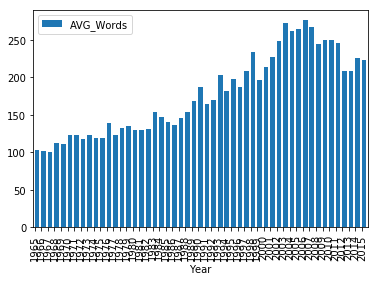

In [16]:
plt.figure(figsize=(8, 6))
#plt.set_size_inches(18.5, 10.5)
#dataf.set_xticks(dataf.get_xticks()[::2])
dataf.plot(kind='bar',align='edge', width=0.7)


from matplotlib import pyplot as plt

plt.savefig('foo.png')
plt.savefig('foo.pdf')

In [17]:
#adding list to dataframe as column  

In [18]:
#df=0


In [19]:
#plt.rcParams['figure.figsize'] = (50,60)

In [20]:
#df['Rank'] = Pd_song_read['Rank']

In [21]:
df=pd.DataFrame(Pd_song_read['Artist'])
df['Year'] = (Pd_song_read['Year'])
df['Words']=(Pd_song_read['stopword_lyrc'])
df['Word_Count']=num_words

In [22]:
df.head(3)

Artist  Year  \
0  sam the sham and the pharaohs  1965   
1                      four tops  1965   
2             the rolling stones  1965   

                                               Words  Word_Count  
0  [uno, dos, one, two, tres, quatro, matty, told...          80  
1  [sugar, pie, honey, bunch, know, love, cant, h...         106  
2  [I, ca, get, satisfaction, I, ca, get, satisfa...         171

In [23]:
#Joining all the lyrics of songs without stop words

In [24]:
str2 = ''
str1 = ''
for index, row in Pd_song_read.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2

In [25]:
#str2

In [26]:
#Word Cloud library to create cloud of words 

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=2000, contour_width=5, contour_color='steelblue',width=600,height=800,relative_scaling=0.3)
WordCloud()
wordcloud.generate(str2)

In [28]:
#collocations = False

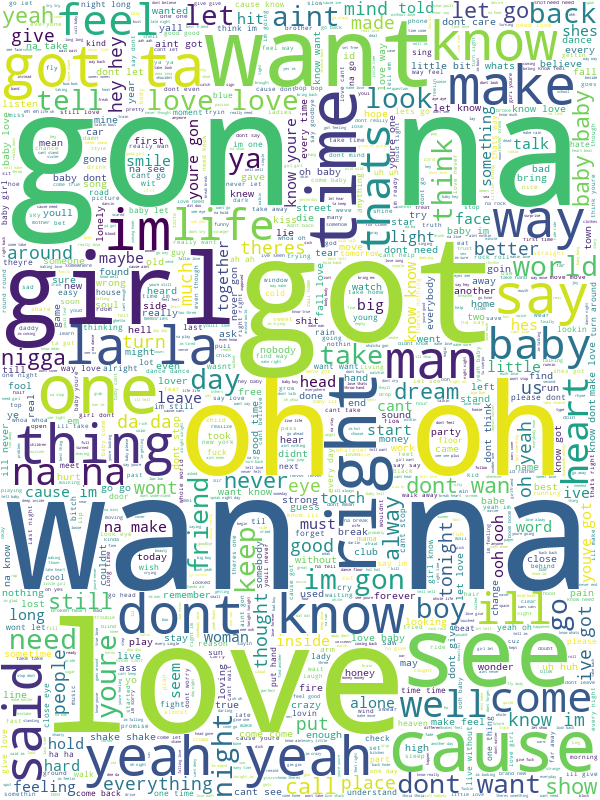

In [29]:
# Visualize the word cloud
# For the whole span
wordcloud.to_image()

In [30]:
#Generating list with the different slices
df_65_70= Pd_song_read[Pd_song_read['Year'].isin([1965,1966,1967,1968,1969])]
df_71_74= Pd_song_read[Pd_song_read['Year'].isin([1970,1971,1972,1973,1974])]
df_75_80= Pd_song_read[Pd_song_read['Year'].isin([1975,1976,1977,1978,1979])]
df_81_84= Pd_song_read[Pd_song_read['Year'].isin([1980,1981,1982,1983,1984])]
df_85_90= Pd_song_read[Pd_song_read['Year'].isin([1985,1986,1987,1988,1989])]
df_91_94= Pd_song_read[Pd_song_read['Year'].isin([1990,1991,1992,1993,1994])]
df_95_00= Pd_song_read[Pd_song_read['Year'].isin([1995,1996,1997,1998,1999])]
df_01_04= Pd_song_read[Pd_song_read['Year'].isin([2000,2001,2002,2003,2004])]
df_05_10= Pd_song_read[Pd_song_read['Year'].isin([2005,2006,2007,2008,2009])]
df_11_15= Pd_song_read[Pd_song_read['Year'].isin([2010,2011,2012,2013,2014,2015])]

df_65_70
#df_71_74

Song  \
0                                    wooly bully   
1       i cant help myself sugar pie honey bunch   
2                     i cant get no satisfaction   
3                            you were on my mind   
4                   youve lost that lovin feelin   
5                                       downtown   
6                                           help   
7                    cant you hear my heart beat   
8                           crying in the chapel   
9                                        my girl   
10                                help me rhonda   
11                              king of the road   
12                        the birds and the bees   
13                     hold me thrill me kiss me   
14                                       shotgun   
15                                i got you babe   
16                             this diamond ring   
17                                  the in crowd   
18         mrs brown youve got a lovely daughter   
19                      stop in the name of love   
20                              unchained melody   
21                                   silhouettes   
22                    ill never find another you   
23                                      cara mia   
24                             mr tambourine man   
25                    cast your fate to the wind   
26                                  yes im ready   
27                            whats new pussycat   
28                            eve of destruction   
29                                hang on sloopy   
..                                           ...   
463                  this girls in love with you   
464                             color him father   
465                                  black pearl   
466                                 indian giver   
467                               mother popcorn   
469                        things id like to say   
470                                   when i die   
471                        thats the way love is   
472                            everybodys talkin   
473                  the worst that could happen   
474                              the chokin kind   
475                  smile a little smile for me   
476                             polk salad annie   
478                            games people play   
479                                you showed me   
481                              oh what a night   
482                                    something   
483                     this girl is a woman now   
484                                come together   
485                          ramblin gamblin man   
487             i heard it through the grapevine   
488                       gimme gimme good lovin   
492                                 oh happy day   
493                              love me tonight   
494                               mr sun mr moon   
495                                     laughing   
496  my whole world ended the moment you left me   
497                                    soul deep   
498                          hooked on a feeling   
499                           sweet cream ladies   

                                  Artist  Year  \
0          sam the sham and the pharaohs  1965   
1                              four tops  1965   
2                     the rolling stones  1965   
3                                we five  1965   
4                 the righteous brothers  1965   
5                           petula clark  1965   
6                            the beatles  1965   
7                        hermans hermits  1965   
8                          elvis presley  1965   
9                        the temptations  1965   
10                        the beach boys  1965   
11                          roger miller  1965   
12                           jewel akens  1965   
13                            mel carter  1965   
14          junior walker  the all stars  1965   
15                 

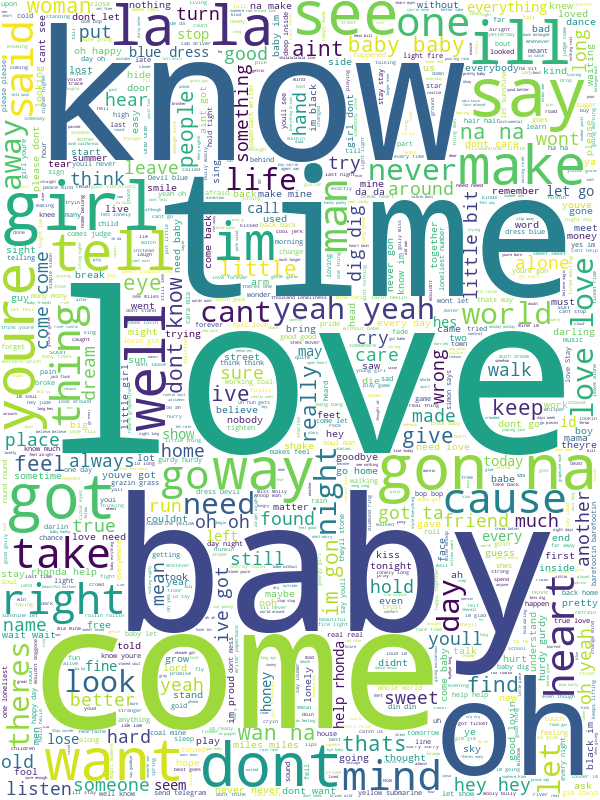

In [31]:
#For the 1965 - 1970 Span

str2 = ''
str1 = ''
for index, row in df_65_70.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()


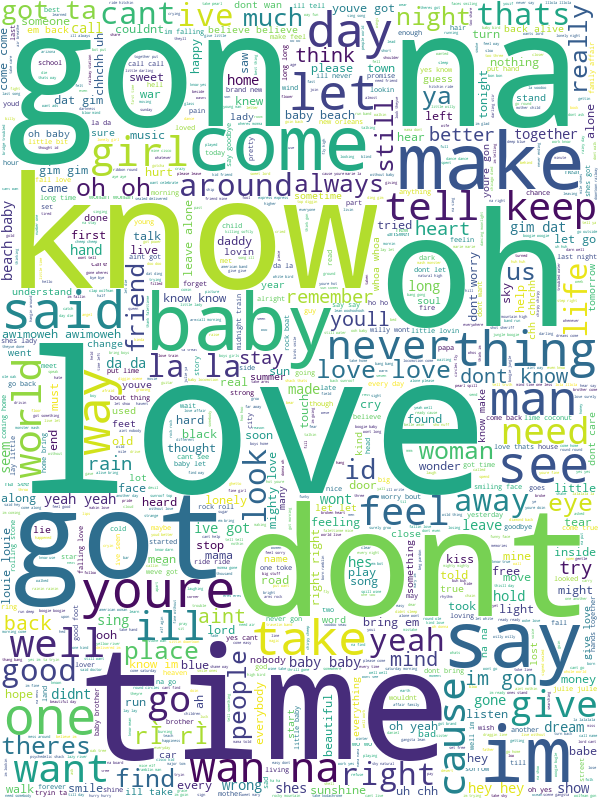

In [32]:
#For the 1971 - 1974 Span

str2 = ''
str1 = ''
for index, row in df_71_74.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()


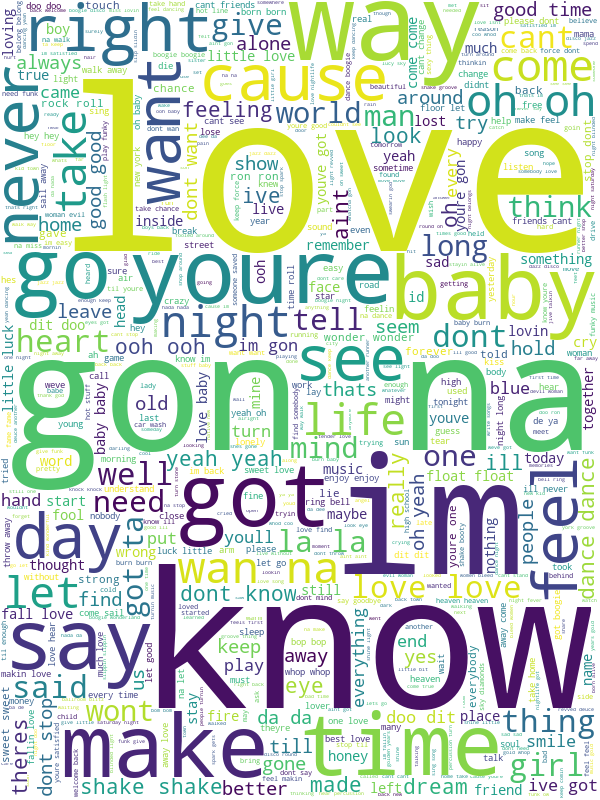

In [33]:
#For the 1975 - 1980 Span

str2 = ''
str1 = ''
for index, row in df_75_80.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()



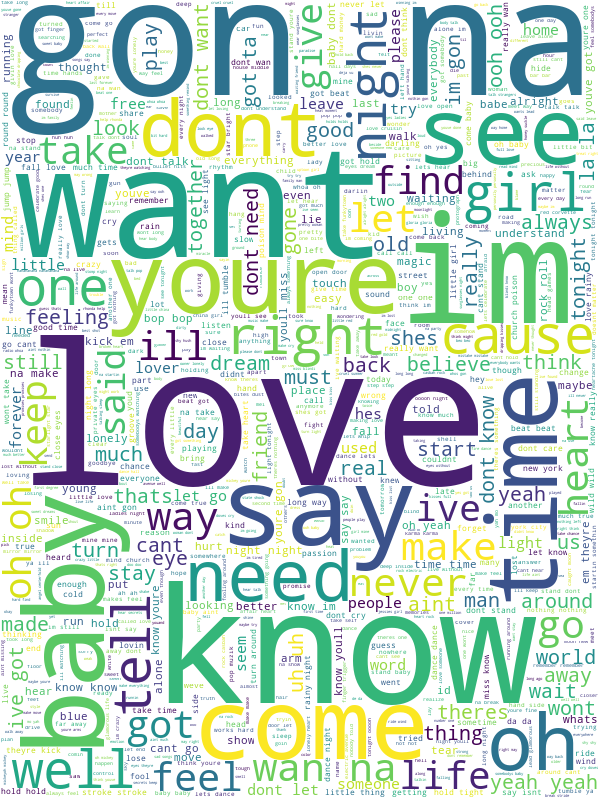

In [34]:
#For the 1981 - 1984 Span

str2 = ''
str1 = ''
for index, row in df_81_84.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()


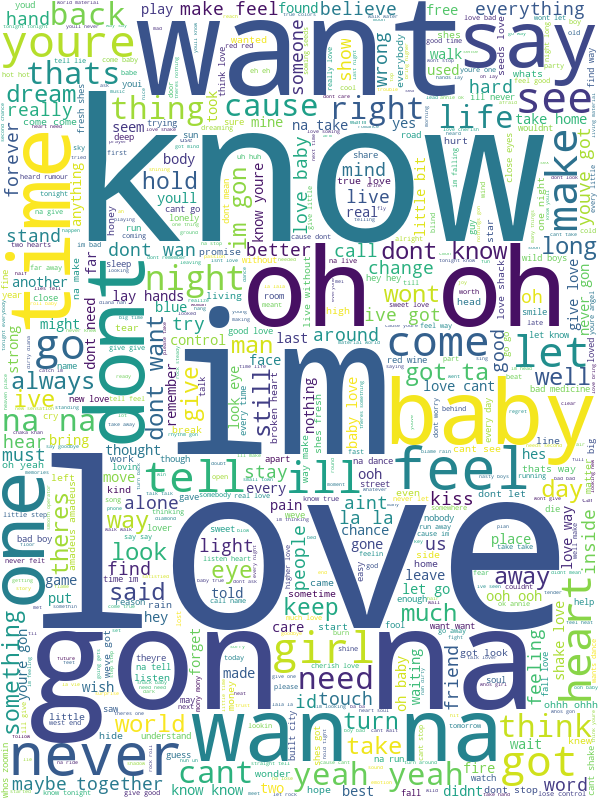

In [35]:
#For the 1985 - 1990 Span

str2 = ''
str1 = ''
for index, row in df_85_90.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()




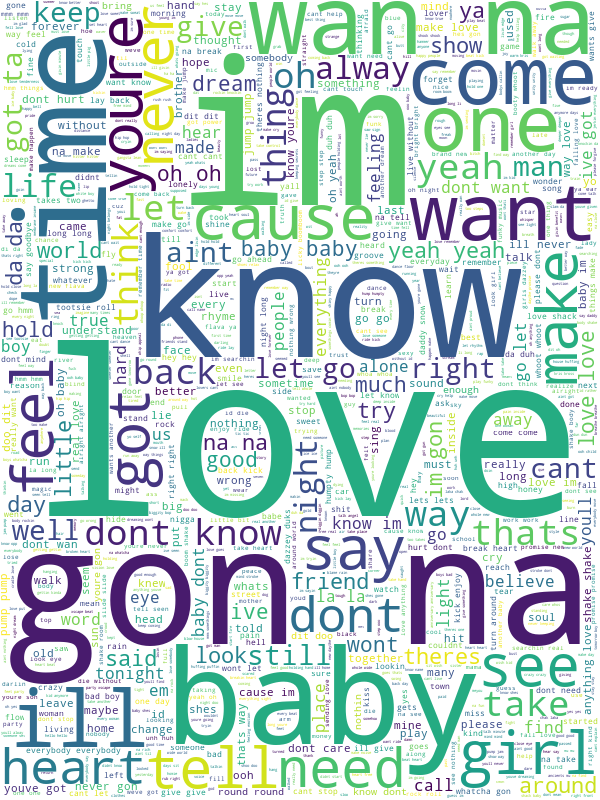

In [36]:
#For the 1991 - 1994 Span

str2 = ''
str1 = ''
for index, row in df_91_94.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()


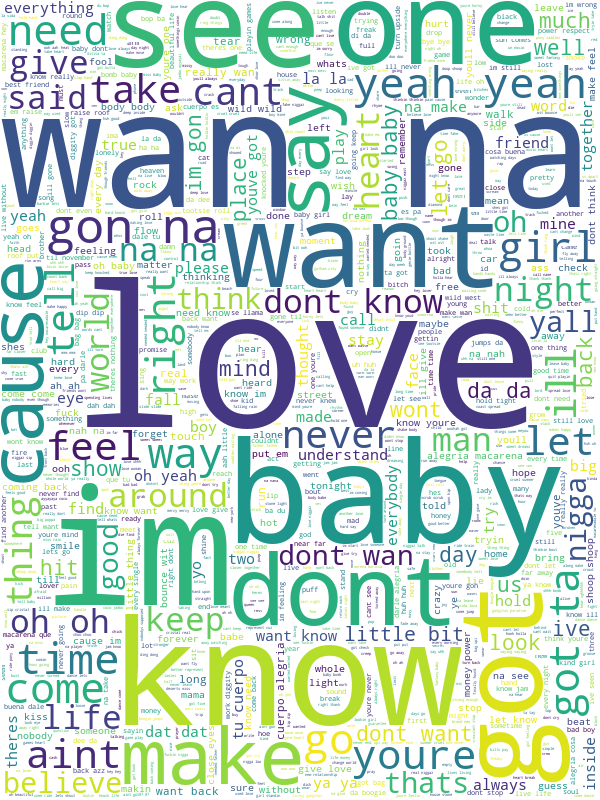

In [37]:
#For the 1995 - 2000 Span

str2 = ''
str1 = ''
for index, row in df_95_00.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()



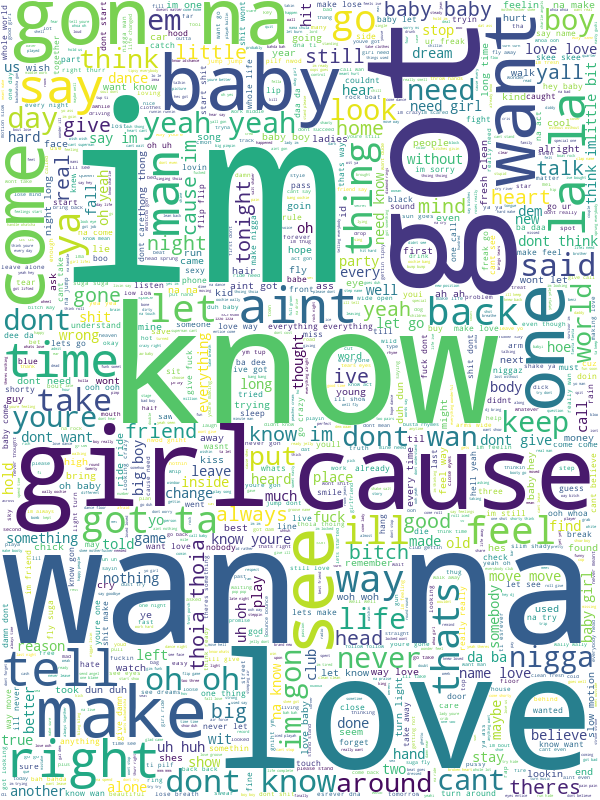

In [38]:
#For the 2001 - 2004 Span

str2 = ''
str1 = ''
for index, row in df_01_04.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()


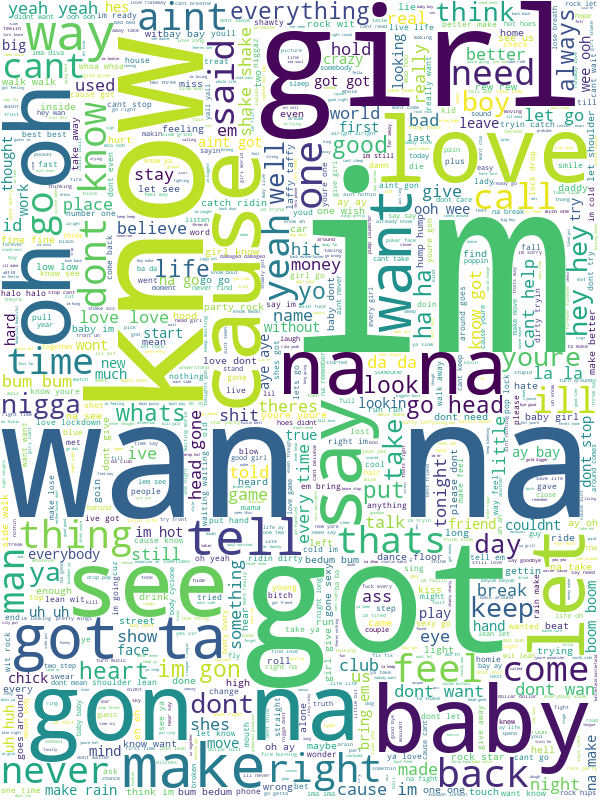

In [39]:
#For the 2005 - 2010 Span

str2 = ''
str1 = ''
for index, row in df_05_10.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()



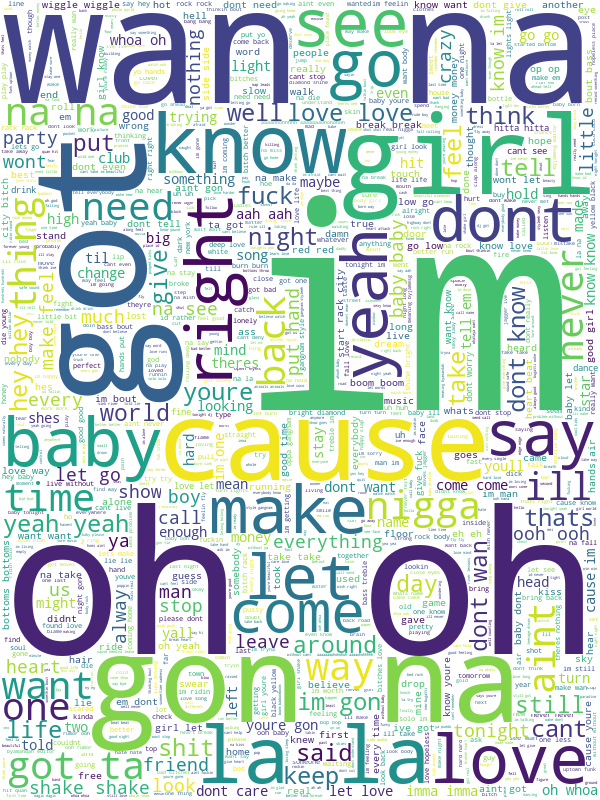

In [40]:
#For the 2011 - 2015 Span

str2 = ''
str1 = ''
for index, row in df_11_15.iterrows():
    ala=row['stopword_lyrc']
    str1=' '.join(ala)
    #print(str1)
    str2 = str1 +' '+ str2
wordcloud.generate(str2)
wordcloud.to_image()



In [41]:
#For the 2005 - 2010 Span
# Shit don't work yo'
#def yearly_junction(dataset):
#    str2 = ''
##    for index, row in dataset.iterrows():
#        ala=row['stopword_lyrc']
#        str1=' '.join(ala)
#        #print(str1)
#        str2 = str1 +' '+ str2
#        return str2
#        
#str2=yearly_junction(df_65_70)
#str2

In [42]:
#!pip3 install seaborn

#wordcloud.generate(str2)

In [43]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [45]:
#function to display top 30 comman words used in lyrics

In [46]:
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [47]:
#count_vectorizer = CountVectorizer(stop_words='english')
#count_data = count_vectorizer.fit_transform(Pd_song_read['Lyrics'])

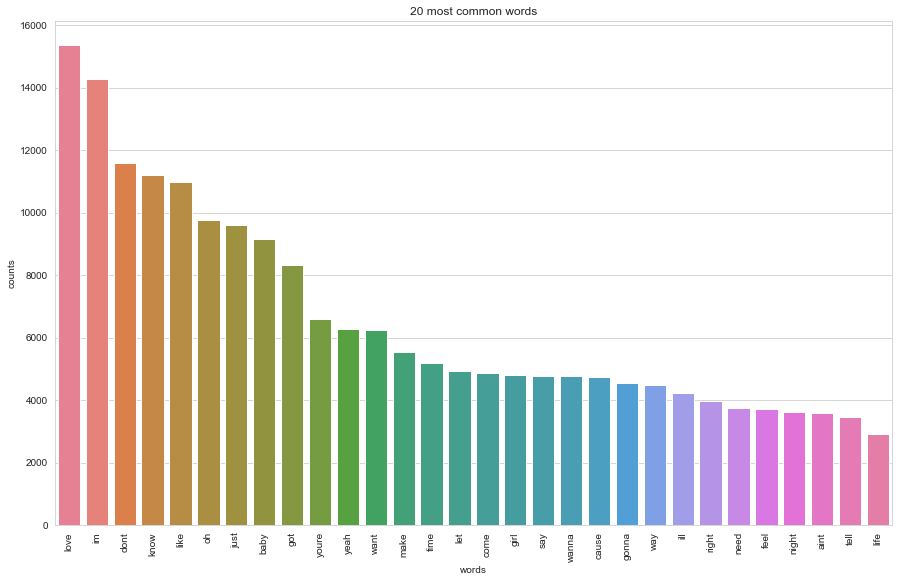

In [48]:
# Visualise the 20 most common words
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(Pd_song_read['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

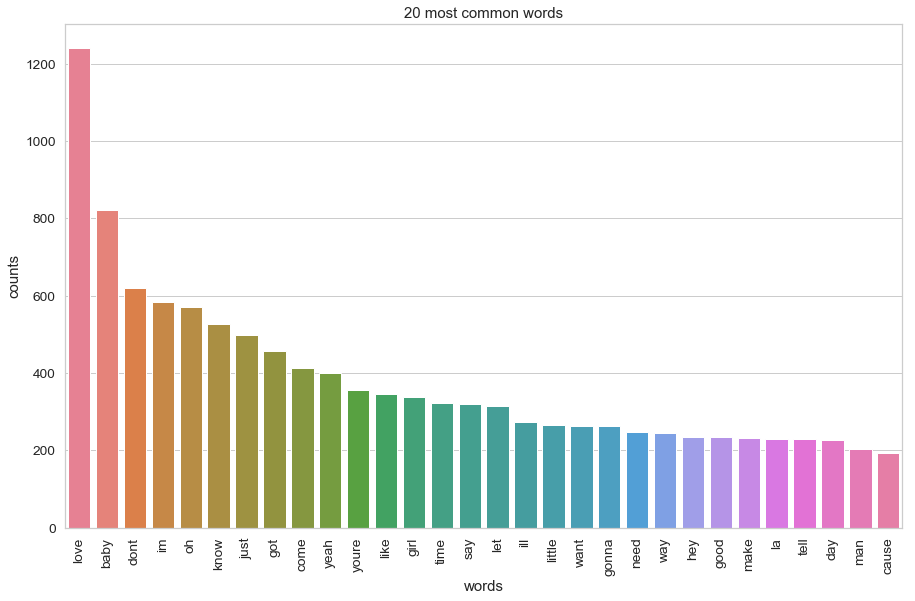

In [49]:
# Visualise the 10 most common words 1965 - 1970
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_65_70['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

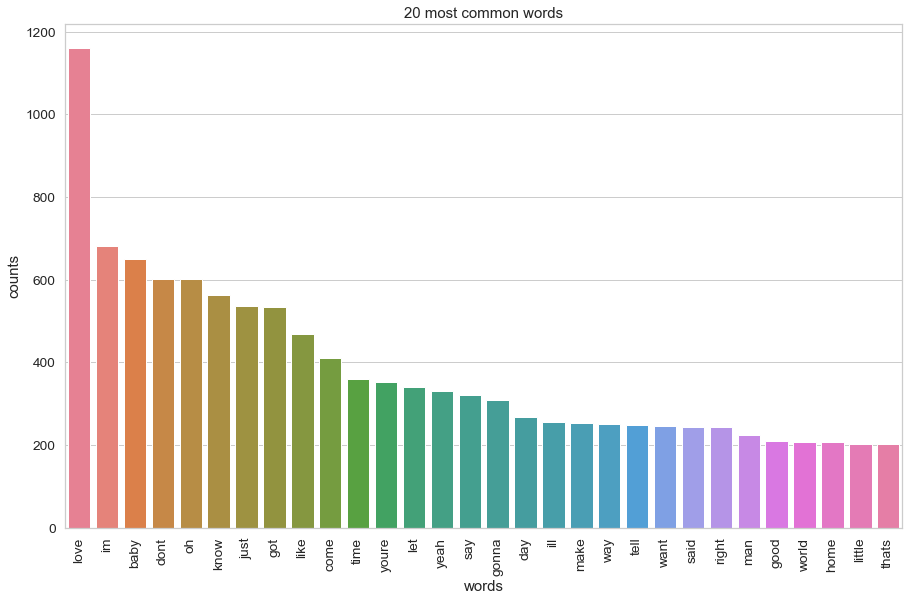

In [50]:
# Visualise the 10 most common words 1971 - 1974
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_71_74['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

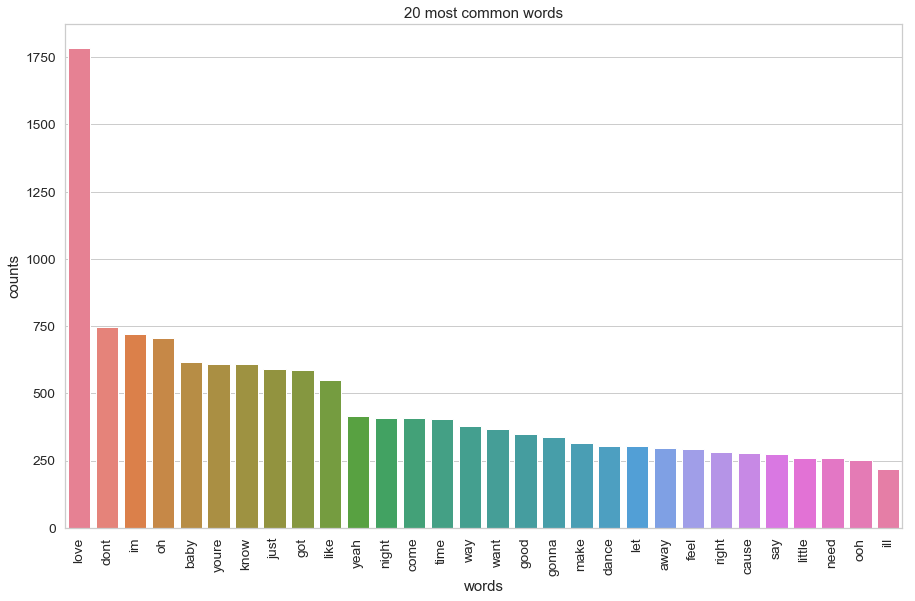

In [51]:
# Visualise the 10 most common words 1975 - 1980
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_75_80['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

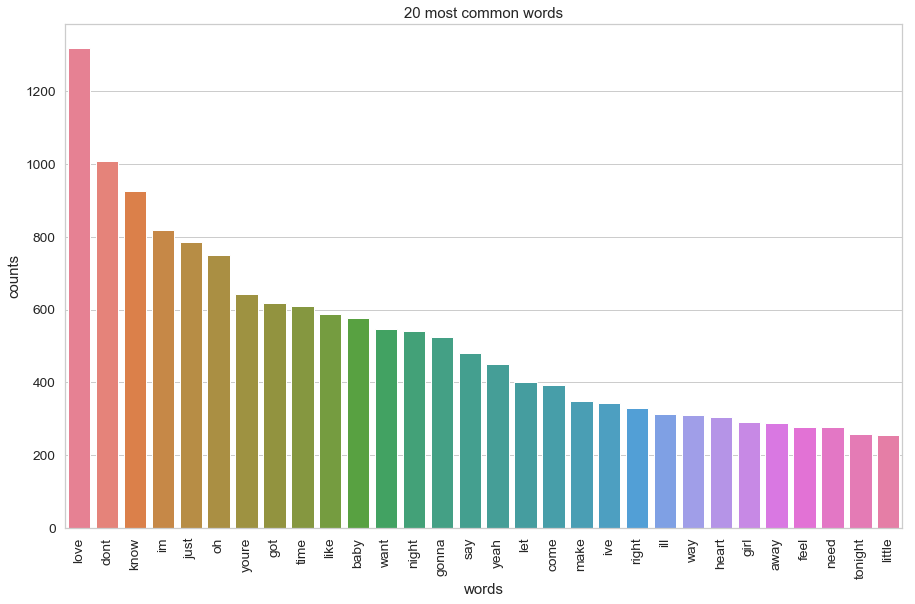

In [52]:
# Visualise the 10 most common words 1981 - 1984
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_81_84['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

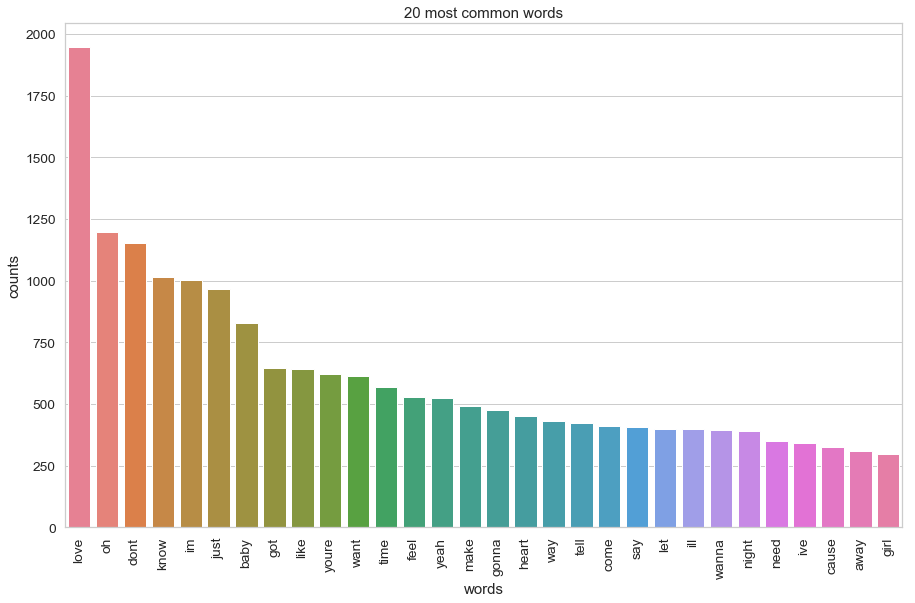

In [53]:
# Visualise the 10 most common words 1985 - 1990
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_85_90['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

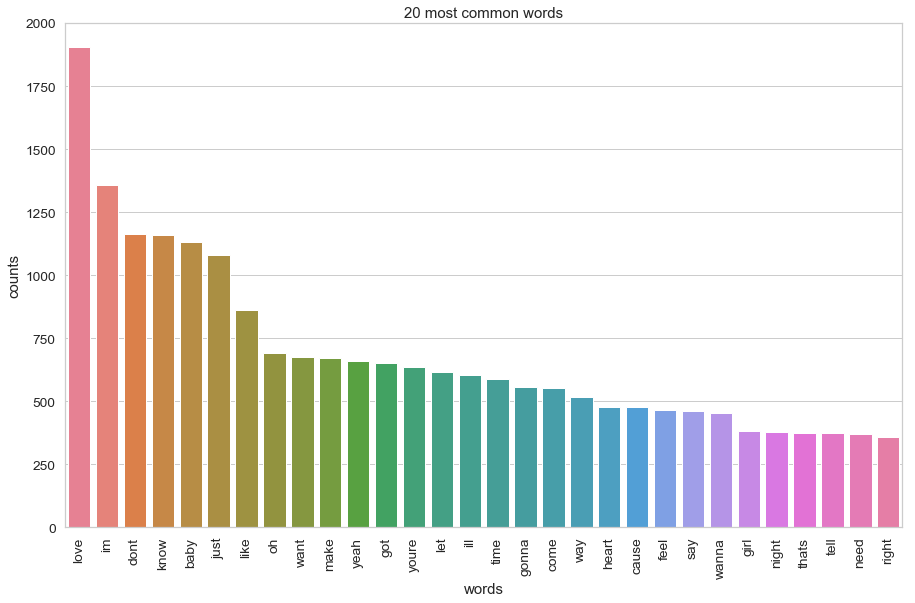

In [54]:
# Visualise the 10 most common words 1991 - 1994
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_91_94['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

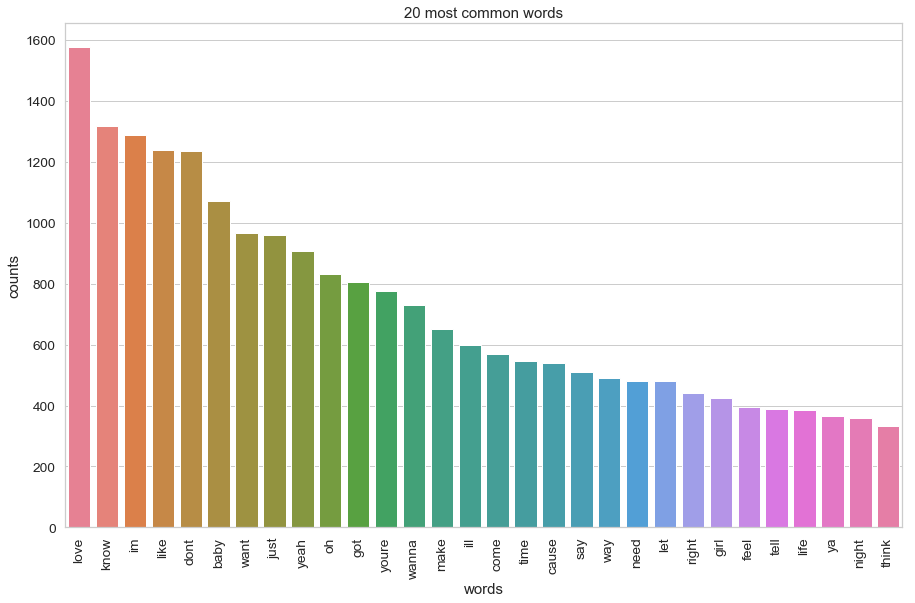

In [55]:
# Visualise the 10 most common words 1995 - 2000
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_95_00['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

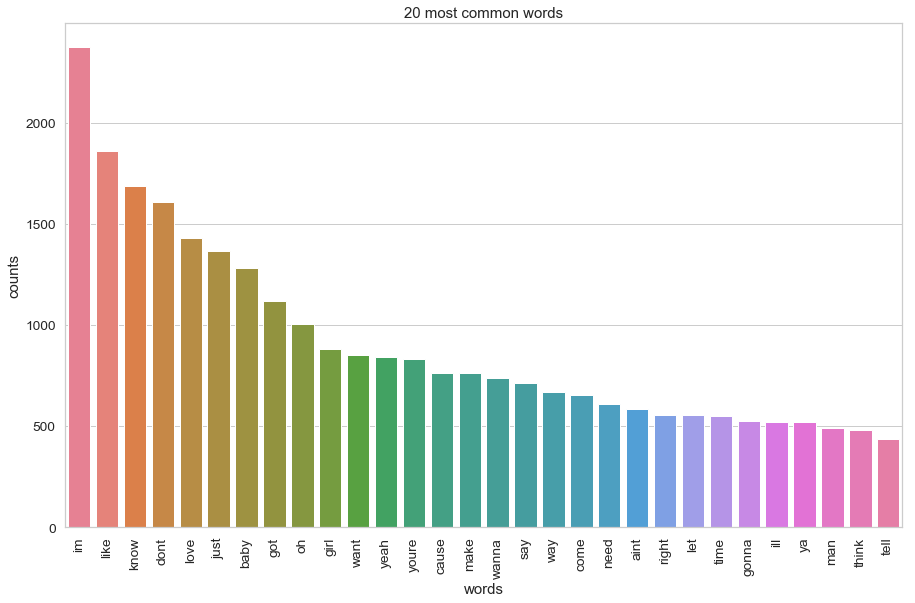

In [56]:
# Visualise the 10 most common words 2001 - 2004
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_01_04['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

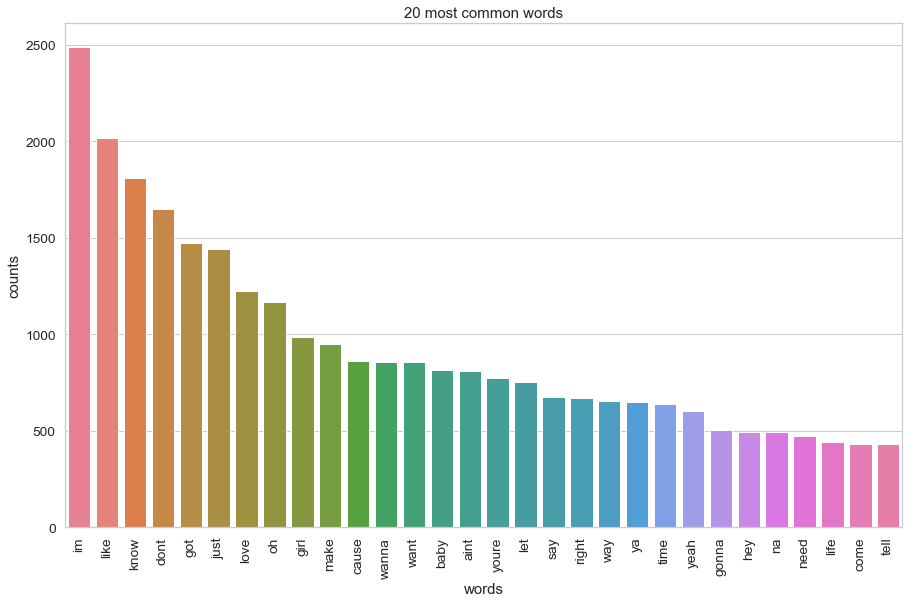

In [57]:
# Visualise the 10 most common words 2005 - 2010
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_05_10['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

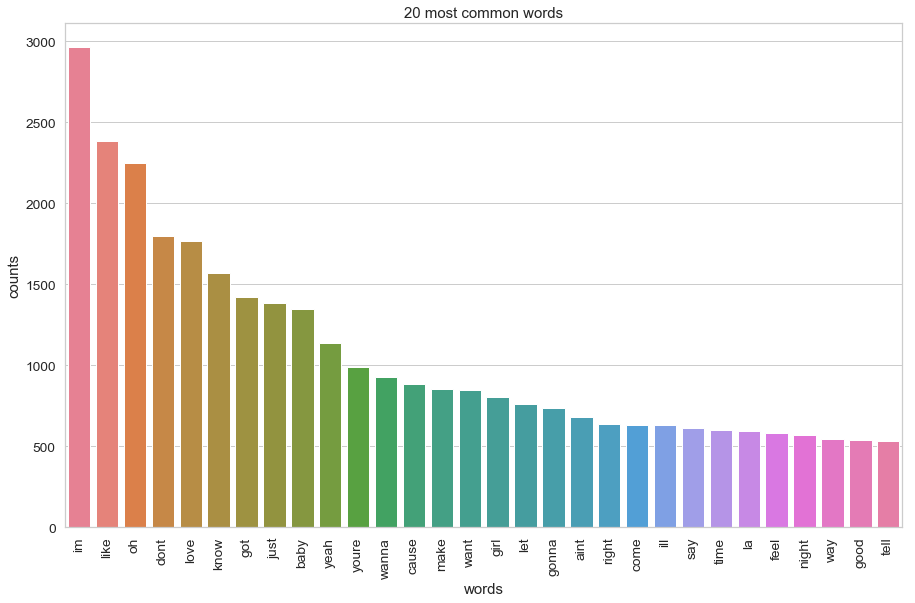

In [58]:
# Visualise the 10 most common words 2011 - 2015
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_11_15['Lyrics'])
plot_20_most_common_words(count_data, count_vectorizer)

In [59]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [60]:
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/miguelreyes/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
#Testing sentiment in lyrics
sentences=Pd_song_read.Lyrics.iloc[3]
sentences

' when i woke up this morning you were on my mind and you were on my mind i got troubles whoaoh i got worries whoaoh i got wounds to bind so i went to the corner just to ease my pains yeah just to ease my pains i got troubles whoaoh i got worries whoaoh i came home again when i woke up this morning you were on my miiiind and you were on my mind i got troubles whoaoh i got worries whoaoh i got wounds to bind and i got a feelin down in my shooooooes said way down in my shooooes yeah i got to ramble whoaoh i got to move on whoaoh i got to walk away my blues when i woke up this morning you were on my mind you were on my mind i got troubles whoaoh i got worries whoaoh i got wounds to bind '

In [62]:
#Pd_song_read[Pd_song_read['Artist']=='the beach boys']

In [63]:
#Using nltk check how much percentage of the lyrics of song is positive, negative and neutral


In [64]:
#Using nltk check how much percentage of the lyrics of song is positive, negative and neutral

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()


def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))
    
    

In [65]:
#Using nltk check how much percentage of the lyrics of song is positive, negative and neutral

#print_sentiment_scores(sentences)


pruebasentimient=analyser.polarity_scores(sentences)
#pruebasentimient=pruebasentimient+pruebasentimient
pruebasentimient
#type(pruebasentimient)



{'neg': 0.186, 'neu': 0.754, 'pos': 0.061, 'compound': -0.9607}

In [78]:
#Running analysis on a yearly basis 1965 example
#for n in range (51):
#    jahr=1965+n

year1965=Pd_song_read[Pd_song_read['Year']==1965]
year1966=Pd_song_read[Pd_song_read['Year']==1966]
year1967=Pd_song_read[Pd_song_read['Year']==1967]
year1968=Pd_song_read[Pd_song_read['Year']==1968]
year1969=Pd_song_read[Pd_song_read['Year']==1969]
year1970=Pd_song_read[Pd_song_read['Year']==1970]
year1971=Pd_song_read[Pd_song_read['Year']==1971]
year1972=Pd_song_read[Pd_song_read['Year']==1972]
year1973=Pd_song_read[Pd_song_read['Year']==1973]
year1974=Pd_song_read[Pd_song_read['Year']==1974]
year1975=Pd_song_read[Pd_song_read['Year']==1975]
year1976=Pd_song_read[Pd_song_read['Year']==1976]
year1977=Pd_song_read[Pd_song_read['Year']==1977]
year1978=Pd_song_read[Pd_song_read['Year']==1978]
year1979=Pd_song_read[Pd_song_read['Year']==1979]
year1980=Pd_song_read[Pd_song_read['Year']==1980]
year1981=Pd_song_read[Pd_song_read['Year']==1981]
year1982=Pd_song_read[Pd_song_read['Year']==1982]
year1983=Pd_song_read[Pd_song_read['Year']==1983]
year1984=Pd_song_read[Pd_song_read['Year']==1984]
year1985=Pd_song_read[Pd_song_read['Year']==1985]
year1986=Pd_song_read[Pd_song_read['Year']==1986]
year1987=Pd_song_read[Pd_song_read['Year']==1987]
year1988=Pd_song_read[Pd_song_read['Year']==1988]
year1989=Pd_song_read[Pd_song_read['Year']==1989]
year1990=Pd_song_read[Pd_song_read['Year']==1990]
year1991=Pd_song_read[Pd_song_read['Year']==1991]
year1992=Pd_song_read[Pd_song_read['Year']==1992]
year1993=Pd_song_read[Pd_song_read['Year']==1993]
year1994=Pd_song_read[Pd_song_read['Year']==1994]
year1995=Pd_song_read[Pd_song_read['Year']==1995]
year1996=Pd_song_read[Pd_song_read['Year']==1996]
year1997=Pd_song_read[Pd_song_read['Year']==1997]
year1998=Pd_song_read[Pd_song_read['Year']==1998]
year1999=Pd_song_read[Pd_song_read['Year']==1999]
year2000=Pd_song_read[Pd_song_read['Year']==2000]
year2001=Pd_song_read[Pd_song_read['Year']==2001]
year2002=Pd_song_read[Pd_song_read['Year']==2002]
year2003=Pd_song_read[Pd_song_read['Year']==2003]
year2004=Pd_song_read[Pd_song_read['Year']==2004]
year2005=Pd_song_read[Pd_song_read['Year']==2005]
year2006=Pd_song_read[Pd_song_read['Year']==2006]
year2007=Pd_song_read[Pd_song_read['Year']==2007]
year2008=Pd_song_read[Pd_song_read['Year']==2008]
year2009=Pd_song_read[Pd_song_read['Year']==2009]
year2010=Pd_song_read[Pd_song_read['Year']==2010]
year2011=Pd_song_read[Pd_song_read['Year']==2011]
year2012=Pd_song_read[Pd_song_read['Year']==2012]
year2013=Pd_song_read[Pd_song_read['Year']==2013]
year2014=Pd_song_read[Pd_song_read['Year']==2014]
year2015=Pd_song_read[Pd_song_read['Year']==2015]


def sentimentcalc(a):
    a1 = a.iloc[:,3:5].copy() 

    ##a1 = pd.DataFrame(a1)
#    dict.clear(diccionario)
    diccionario={200:{}}
    index=0
    #count=0

    for index, row in a1.iterrows():
        ala=row['Lyrics']
    #    count = count+1
    #    count
        
        diccionario[index]=analyser.polarity_scores(ala)
    del diccionario[200]
    return diccionario
    #diccionario

    #from statistics import mean
    #avg_diccionario = {name: mean(tests.values()) for (name, tests) in workDictionary.items()}

year1965 =  sentimentcalc(year1965)
year1966 =  sentimentcalc(year1966)
year1967 =  sentimentcalc(year1967)
year1968 =  sentimentcalc(year1968)
year1969 =  sentimentcalc(year1969)
year1970 =  sentimentcalc(year1970)
year1971 =  sentimentcalc(year1971)
year1972 =  sentimentcalc(year1972)
year1973 =  sentimentcalc(year1973)
year1974 =  sentimentcalc(year1974)
year1975 =  sentimentcalc(year1975)
year1976 =  sentimentcalc(year1976)
year1977 =  sentimentcalc(year1977)
year1978 =  sentimentcalc(year1978)
year1979 =  sentimentcalc(year1979)
year1980 =  sentimentcalc(year1980)
year1981 =  sentimentcalc(year1981)
year1982 =  sentimentcalc(year1982)
year1983 =  sentimentcalc(year1983)
year1984 =  sentimentcalc(year1984)
year1985 =  sentimentcalc(year1985)
year1986 =  sentimentcalc(year1986)
year1987 =  sentimentcalc(year1987)
year1988 =  sentimentcalc(year1988)
year1989 =  sentimentcalc(year1989)
year1990 =  sentimentcalc(year1990)
year1991 =  sentimentcalc(year1991)
year1992 =  sentimentcalc(year1992)
year1993 =  sentimentcalc(year1993)
year1994 =  sentimentcalc(year1994)
year1995 =  sentimentcalc(year1995)
year1996 =  sentimentcalc(year1996)
year1997 =  sentimentcalc(year1997)
year1998 =  sentimentcalc(year1998)
year1999 =  sentimentcalc(year1999)
year2000 =  sentimentcalc(year2000)
year2001 =  sentimentcalc(year2001)
year2002 =  sentimentcalc(year2002)
year2003 =  sentimentcalc(year2003)
year2004 =  sentimentcalc(year2004)
year2005 =  sentimentcalc(year2005)
year2006 =  sentimentcalc(year2006)
year2007 =  sentimentcalc(year2007)
year2008 =  sentimentcalc(year2008)
year2009 =  sentimentcalc(year2009)
year2010 =  sentimentcalc(year2010)
year2011 =  sentimentcalc(year2011)
year2012 =  sentimentcalc(year2012)
year2013 =  sentimentcalc(year2013)
year2014 =  sentimentcalc(year2014)
year2015 =  sentimentcalc(year2015)


In [92]:
def averagedict(a):
    sumneg = 0
    sumneu = 0
    sumpos = 0
    sumcomp = 0
    
    
    for k in a:
        sumneg += float(a[k]['neg'])
        sumneu += float(a[k]['neu'])
        sumpos+= float(a[k]['pos'])
        sumcomp += float(a[k]['compound'])
        
        
    avgneg = sumneg/len(a)
    avgneu = sumneu/len(a)
    avgpos = sumpos/len(a)
    avgcomp = sumcomp/len(a)
    
    b={avgneg, avgneu, avgpos, avgcomp}
    
    #print( "Mean: " + str(sum/len(a)))
    
    #print(len(a))
    
#    print ("AVG neg: " + str(avgneg))
#    print ("AVG neu: " + str(avgneu))
#    print ("AVG pos: " + str(avgpos))
#    print ("AVG comp: " + str(avgcomp))
    
#    print (b)
    
    return b

SentAVG1965 = list(averagedict(year1965))
SentAVG1966 = list(averagedict(year1966))
SentAVG1967 = list(averagedict(year1967))
SentAVG1968 = list(averagedict(year1968))
SentAVG1969 = list(averagedict(year1969))
SentAVG1970 = list(averagedict(year1970))
SentAVG1971 = list(averagedict(year1971))
SentAVG1972 = list(averagedict(year1972))
SentAVG1973 = list(averagedict(year1973))
SentAVG1974 = list(averagedict(year1974))
SentAVG1975 = list(averagedict(year1975))
SentAVG1976 = list(averagedict(year1976))
SentAVG1977 = list(averagedict(year1977))
SentAVG1978 = list(averagedict(year1978))
SentAVG1979 = list(averagedict(year1979))
SentAVG1980 = list(averagedict(year1980))
SentAVG1981 = list(averagedict(year1981))
SentAVG1982 = list(averagedict(year1982))
SentAVG1983 = list(averagedict(year1983))
SentAVG1984 = list(averagedict(year1984))
SentAVG1985 = list(averagedict(year1985))
SentAVG1986 = list(averagedict(year1986))
SentAVG1987 = list(averagedict(year1987))
SentAVG1988 = list(averagedict(year1988))
SentAVG1989 = list(averagedict(year1989))
SentAVG1990 = list(averagedict(year1990))
SentAVG1991 = list(averagedict(year1991))
SentAVG1992 = list(averagedict(year1992))
SentAVG1993 = list(averagedict(year1993))
SentAVG1994 = list(averagedict(year1994))
SentAVG1995 = list(averagedict(year1995))
SentAVG1996 = list(averagedict(year1996))
SentAVG1997 = list(averagedict(year1997))
SentAVG1998 = list(averagedict(year1998))
SentAVG1999 = list(averagedict(year1999))
SentAVG2000 = list(averagedict(year2000))
SentAVG2001 = list(averagedict(year2001))
SentAVG2002 = list(averagedict(year2002))
SentAVG2003 = list(averagedict(year2003))
SentAVG2004 = list(averagedict(year2004))
SentAVG2005 = list(averagedict(year2005))
SentAVG2006 = list(averagedict(year2006))
SentAVG2007 = list(averagedict(year2007))
SentAVG2008 = list(averagedict(year2008))
SentAVG2009 = list(averagedict(year2009))
SentAVG2010 = list(averagedict(year2010))
SentAVG2011 = list(averagedict(year2011))
SentAVG2012 = list(averagedict(year2012))
SentAVG2013 = list(averagedict(year2013))
SentAVG2014 = list(averagedict(year2014))
SentAVG2015 = list(averagedict(year2015))

In [121]:
plotneg=[SentAVG1965[0],SentAVG1966[0],SentAVG1967[0],SentAVG1968[0],SentAVG1969[0],SentAVG1970[0],SentAVG1971[0],SentAVG1972[0],SentAVG1973[0],SentAVG1974[0],SentAVG1975[0],SentAVG1976[0],SentAVG1977[0],SentAVG1978[0],SentAVG1979[0],SentAVG1980[0],SentAVG1981[0],SentAVG1982[0],SentAVG1983[0],SentAVG1984[0],SentAVG1985[0],SentAVG1986[0],SentAVG1987[0],SentAVG1988[0],SentAVG1989[0],SentAVG1990[0],SentAVG1991[0],SentAVG1992[0],SentAVG1993[0],SentAVG1994[0],SentAVG1995[0],SentAVG1996[0],SentAVG1997[0],SentAVG1998[0],SentAVG1999[0],SentAVG2000[0],SentAVG2001[0],SentAVG2002[0],SentAVG2003[0],SentAVG2004[0],SentAVG2005[0],SentAVG2006[0],SentAVG2007[0],SentAVG2008[0],SentAVG2009[0],SentAVG2010[0],SentAVG2011[0],SentAVG2012[0],SentAVG2013[0],SentAVG2014[0],SentAVG2015[0]]

plotneu=[SentAVG1965[1],SentAVG1966[1],SentAVG1967[1],SentAVG1968[1],SentAVG1969[1],SentAVG1970[1],SentAVG1971[1],SentAVG1972[1],SentAVG1973[1],SentAVG1974[1],SentAVG1975[1],SentAVG1976[1],SentAVG1977[1],SentAVG1978[1],SentAVG1979[1],SentAVG1980[1],SentAVG1981[1],SentAVG1982[1],SentAVG1983[1],SentAVG1984[1],SentAVG1985[1],SentAVG1986[1],SentAVG1987[1],SentAVG1988[1],SentAVG1989[1],SentAVG1990[1],SentAVG1991[1],SentAVG1992[1],SentAVG1993[1],SentAVG1994[1],SentAVG1995[1],SentAVG1996[1],SentAVG1997[1],SentAVG1998[1],SentAVG1999[1],SentAVG2000[1],SentAVG2001[1],SentAVG2002[1],SentAVG2003[1],SentAVG2004[1],SentAVG2005[1],SentAVG2006[1],SentAVG2007[1],SentAVG2008[1],SentAVG2009[1],SentAVG2010[1],SentAVG2011[1],SentAVG2012[1],SentAVG2013[1],SentAVG2014[1],SentAVG2015[1]]

plotpos=[SentAVG1965[2],SentAVG1966[2],SentAVG1967[2],SentAVG1968[2],SentAVG1969[2],SentAVG1970[2],SentAVG1971[2],SentAVG1972[2],SentAVG1973[2],SentAVG1974[2],SentAVG1975[2],SentAVG1976[2],SentAVG1977[2],SentAVG1978[2],SentAVG1979[2],SentAVG1980[2],SentAVG1981[2],SentAVG1982[2],SentAVG1983[2],SentAVG1984[2],SentAVG1985[2],SentAVG1986[2],SentAVG1987[2],SentAVG1988[2],SentAVG1989[2],SentAVG1990[2],SentAVG1991[2],SentAVG1992[2],SentAVG1993[2],SentAVG1994[2],SentAVG1995[2],SentAVG1996[2],SentAVG1997[2],SentAVG1998[2],SentAVG1999[2],SentAVG2000[2],SentAVG2001[2],SentAVG2002[2],SentAVG2003[2],SentAVG2004[2],SentAVG2005[2],SentAVG2006[2],SentAVG2007[2],SentAVG2008[2],SentAVG2009[2],SentAVG2010[2],SentAVG2011[2],SentAVG2012[2],SentAVG2013[2],SentAVG2014[2],SentAVG2015[2]]

plotcomp=[SentAVG1965[3],SentAVG1966[3],SentAVG1967[3],SentAVG1968[3],SentAVG1969[3],SentAVG1970[3],SentAVG1971[3],SentAVG1972[3],SentAVG1973[3],SentAVG1974[3],SentAVG1975[3],SentAVG1976[3],SentAVG1977[3],SentAVG1978[3],SentAVG1979[3],SentAVG1980[3],SentAVG1981[3],SentAVG1982[3],SentAVG1983[3],SentAVG1984[3],SentAVG1985[3],SentAVG1986[3],SentAVG1987[3],SentAVG1988[3],SentAVG1989[3],SentAVG1990[3],SentAVG1991[3],SentAVG1992[3],SentAVG1993[3],SentAVG1994[3],SentAVG1995[3],SentAVG1996[3],SentAVG1997[3],SentAVG1998[3],SentAVG1999[3],SentAVG2000[3],SentAVG2001[3],SentAVG2002[3],SentAVG2003[3],SentAVG2004[3],SentAVG2005[3],SentAVG2006[3],SentAVG2007[3],SentAVG2008[3],SentAVG2009[3],SentAVG2010[3],SentAVG2011[3],SentAVG2012[3],SentAVG2013[3],SentAVG2014[3],SentAVG2015[3]]

type(plotneg)

list

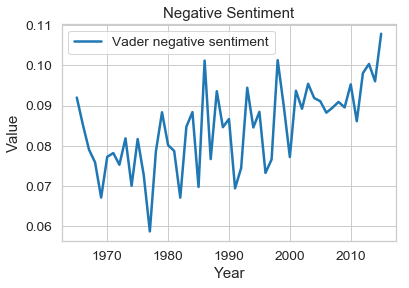

In [131]:
import matplotlib.pyplot as plt

x=list(range(1965,2016))
y = plotneg
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Negative Sentiment")
#for i in range(len(y[0])):
plt.plot(x,y,label = 'Vader negative sentiment')
plt.legend()
plt.show()

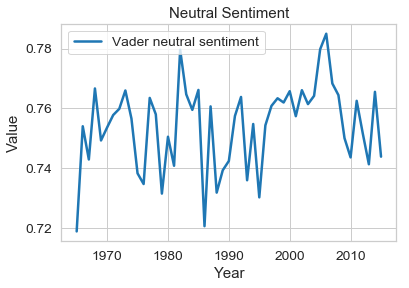

In [132]:
import matplotlib.pyplot as plt

x=list(range(1965,2016))
y = plotneu
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Neutral Sentiment")
#for i in range(len(y[0])):
plt.plot(x,y,label = 'Vader neutral sentiment')
plt.legend()
plt.show()

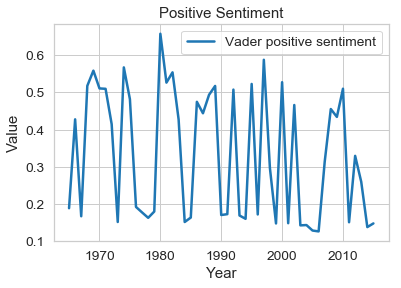

In [133]:
import matplotlib.pyplot as plt

x=list(range(1965,2016))
y = plotpos
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Positive Sentiment")
#for i in range(len(y[0])):
plt.plot(x,y,label = 'Vader positive sentiment')
plt.legend()
plt.show()

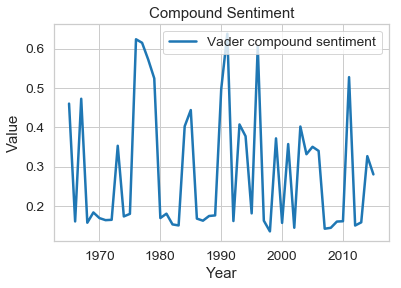

In [134]:
import matplotlib.pyplot as plt

x=list(range(1965,2016))
y = plotcomp
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Compound Sentiment")
#for i in range(len(y[0])):
plt.plot(x,y,label = 'Vader compound sentiment')
plt.legend()
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'range'

In [66]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#sid = SentimentIntensityAnalyzer()

#sentences=['sugar','pie', 'honey', 'bunch', 'know', 'love', 'cant', 'help', 'love', 'nobody', 'elsein', 'life', 'come', 'go', 'leaving', 'picture', 'behind', 'kissed', 'thousand', 'timeswhen', 'snap' 'finger', 'wink', 'eye', 'come', 'arunning', 'im', 'tied', 'apron', 'strings', 'theres', 'nothing', 'docant', 'help', 'cant', 'help','myselfsugar', 'pie', 'honey', 'bunch', 'im', 'weaker', 'man', 'cant','help', 'im', 'love', 'seewanna', 'tell', 'dont', 'love', 'tell', 'tried','every', 'time', 'see', 'face', 'sugar', 'pie', 'honey', 'bunch', 'know', 'im', 'weak','cant', 'help', 'love', 'nobody', 'elsesugar', 'pie', 'honey', 'bunch', 'anything', 'ask', 'cant', 'help', 'want', 'nobody', 'elsesugar', 'pie', 'honey', 'bunch', 'know', 'love','cant', 'help', 'cant', 'help']
#for sentence in sentences:
#    ss = sid.polarity_scores(sentence) 
#print (ss)


{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
dfr = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in artists:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    f = open('lyrics/' + artist + '-cleaned', 'rb')
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    dfr.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
                 
dfr.plot.bar(x='artist', stacked=True)
plt.show()          

NameError: name 'artists' is not defined

In [69]:
comp.keys()

NameError: name 'comp' is not defined

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
comp1 = []
for artist in Pd_song_read.Artist.head(500):
    f = Pd_song_read.Lyrics.head(500)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        comp1.append(comp)
    
      
    
    pdf_Label.loc[i] = (artist)
    i+=1
    
    
#pdf_Label.plot.bar(x='artist', stacked=True)
#plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            
            
    

In [353]:
!pip install holoviews

    100% |████████████████████████████████| 4.0MB 5.4MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 12.4MB/s ta 0:00:01


In [ ]:
#converting list to Pandas Dataframe

In [59]:
NEW = pd.DataFrame(comp1)

In [60]:
pdf_Label['neg'] = NEW['neg']
pdf_Label['pos'] = NEW['pos']
#pdf_Label['neu'] = NEW['neu']
#pdf_Label['compound'] = NEW['compound']    

In [62]:
pdf_Label.count()

artist    10
pos       10
neu       10
neg       10
dtype: int64

In [354]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

In [358]:
bars = hv.Bars(pdf_Label)


:Bars   [artist]   (pos,neu,neg)

:Bars   [artist]   (pos,neu,neg)


In [371]:
pdf_Label.plot.bar(x='artist',stacked=True, figsize=(10,7))

NameError: name 'kwds' is not defined

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

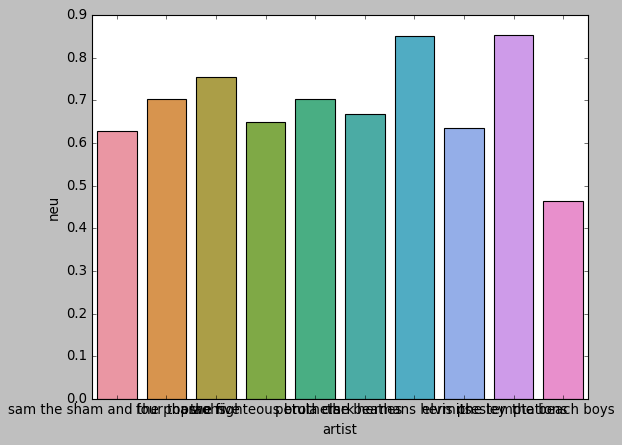

In [383]:
sns.barplot(x=pdf_Label.artist,y=pdf_Label.neu)

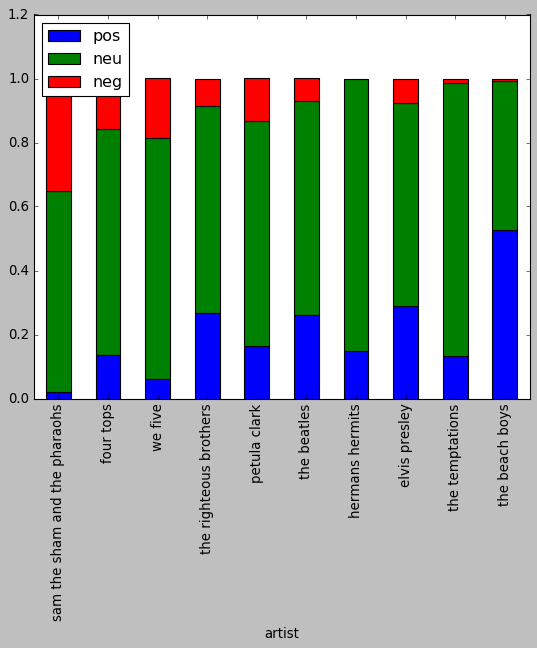

In [350]:
pdf_Label.plot.bar(x='artist', stacked=True,)
plt.show()

sam the sham and the pharaohs 9 4 37
50
18.0
four tops 18 8 74
100
18.0
we five 27 12 111
150
18.0
the righteous brothers 36 16 148
200
18.0
petula clark 45 20 185
250
18.0
the beatles 54 24 222
300
18.0
hermans hermits 63 28 259
350
18.0
elvis presley 72 32 296
400
18.0
the temptations 81 36 333
450
18.0
the beach boys 90 40 370
500
18.0
roger miller 99 44 407
550
18.0
jewel akens 108 48 444
600
18.0
mel carter 117 52 481
650
18.0
junior walker  the all stars 126 56 518
700
18.0
sonny  cher 135 60 555
750
18.0
gary lewis  the playboys 144 64 592
800
18.0
ramsey lewis trio 153 68 629
850
18.0
hermans hermits 162 72 666
900
18.0
the supremes 171 76 703
950
18.0
the righteous brothers 180 80 740
1000
18.0
hermans hermits 189 84 777
1050
18.0
the seekers 198 88 814
1100
18.0
jay and the americans 207 92 851
1150
18.0
the byrds 216 96 888
1200
18.0
sounds orchestral 225 100 925
1250
18.0
barbara mason 234 104 962
1300
18.0
tom jones 243 108 999
1350
18.0
barry mcguire 252 112 1036
1400
18.

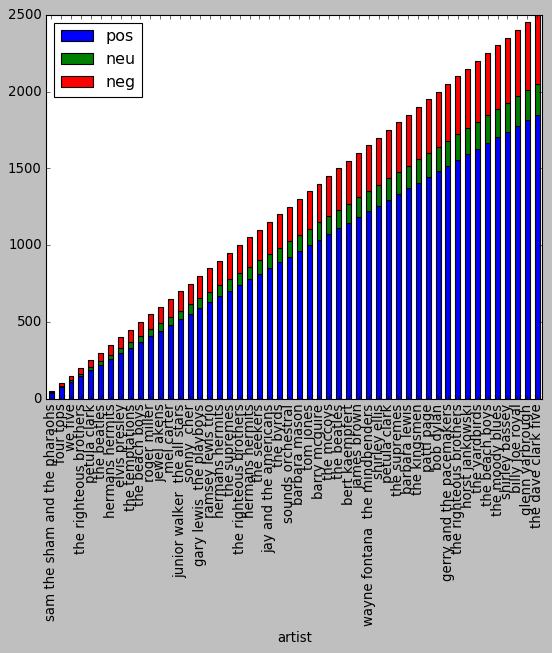

In [272]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
for artist in Pd_song_read.Artist.head(50):
    f = Pd_song_read.Lyrics.head(50)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        
        comp1 = comp['compound']
        if comp1 >= 0.5:
            num_positive += 1
        elif comp1 > -0.5 and comp1 < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
   
    print(artist,num_negative,num_neutral,num_positive)
    num_total = num_negative + num_neutral + num_positive
    print(num_total)
    percent_negative = (num_negative/(num_total))*100
    print(percent_negative)
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    #print(artist,percent_negative,percent_negative,percent_positive)
    pdf_Label.loc[i] = (artist, num_positive, num_neutral, num_negative)
    i+=1
    
    
pdf_Label.plot.bar(x='artist', stacked=True)
plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            

In [268]:
(12/60)*100

20.0

In [249]:
pdf_Label

artist pos neu neg    comp
0                               wooly bully   7   1   2  0.9997
1  i cant help myself sugar pie honey bunch  14   2   4  0.9997
2                       you were on my mind  21   3   6  0.9997
3              youve lost that lovin feelin  28   4   8  0.9997
4                                  downtown  35   5  10  0.9997
5                                      help  42   6  12  0.9997
6               cant you hear my heart beat  49   7  14  0.9997
7                      crying in the chapel  56   8  16  0.9997
8                                   my girl  63   9  18  0.9997
9                            help me rhonda  70  10  20  0.9997

In [200]:
for artist in Pd_song_read.Artist.head(10):
    print(artist)

sam the sham and the pharaohs
four tops
we five
the righteous brothers
petula clark
the beatles
hermans hermits
elvis presley
the temptations
the beach boys


In [204]:
this_sentence

'well since she put me down i ve been out doin in my head come in late at night and in the mornin i just lay in bed well rhonda you look so fine look so fine and i know it wouldnt take much time for you to help me rhonda help me get her out of my heart help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda yeah get her out of my heart she was gonna be my wife and i was gonna be her man but she let another guy come between us and it ruined our plan well rhonda you caught my eye caught my eye and i can give you lotsa reasons why you gotta help me rhonda help me get her out of my heart help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda yeah get her ou

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in Pd_song_read.Artist:
    num_positive = 0
    num_negative = 0
    num_neutral = 0
    
    f = Pd_song_read.Lyrics
    for sentence in f:
        this_sentence = sentence
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
            
    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    pdf_Label.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
    
pdf_Label.head(20).plot.bar(x='artist', stacked=True)
plt.show()          


In [149]:
num_positive=[]
for i in range(2):
    num_positive =+1

In [150]:
num_positive

1

In [36]:
num_words_this

172

In [133]:
pdf_Label

artist   pos   neu   neg
0                         sam the sham and the pharaohs  70.0  10.0  20.0
1                                             four tops  70.0  10.0  20.0
2                                               we five  70.0  10.0  20.0
3                                the righteous brothers  70.0  10.0  20.0
4                                          petula clark  70.0  10.0  20.0
5                                           the beatles  70.0  10.0  20.0
6                                       hermans hermits  70.0  10.0  20.0
7                                         elvis presley  70.0  10.0  20.0
8                                       the temptations  70.0  10.0  20.0
9                                        the beach boys  70.0  10.0  20.0
10                                         roger miller  70.0  10.0  20.0
11                                          jewel akens  70.0  10.0  20.0
12                                           mel carter  70.0  10.0  20.0
13                         junior walker  the all stars  70.0  10.0  20.0
14                                          sonny  cher  70.0  10.0  20.0
15                             gary lewis  the playboys  70.0  10.0  20.0
16                                    ramsey lewis trio  70.0  10.0  20.0
17                                      hermans hermits  70.0  10.0  20.0
18                                         the supremes  70.0  10.0  20.0
19                               the righteous brothers  70.0  10.0  20.0
20                                      hermans hermits  70.0  10.0  20.0
21                                          the seekers  70.0  10.0  20.0
22                                jay and the americans  70.0  10.0  20.0
23                                            the byrds  70.0  10.0  20.0
24                                    sounds orchestral  70.0  10.0  20.0
25                                        barbara mason  70.0  10.0  20.0
26                                            tom jones  70.0  10.0  20.0
27                                        barry mcguire  70.0  10.0  20.0
28                                           the mccoys  70.0  10.0  20.0
29                                          the beatles  70.0  10.0  20.0
...                                                 ...   ...   ...   ...
4838                                       rae sremmurd  70.0  10.0  20.0
4839                                          vance joy  70.0  10.0  20.0
4840                 jidenna featuring roman gianarthur  70.0  10.0  20.0
4841                                          elle king  70.0  10.0  20.0
4842                                     meghan trainor  70.0  10.0  20.0
4843              charlie puth featuring meghan trainor  70.0  10.0  20.0
4844               meghan trainor featuring john legend  70.0  10.0  20.0
4845                                            tove lo  70.0  10.0  20.0
4846    james newton howard featuring jennifer lawrence  70.0  10.0  20.0
4847                                         ot genasis  70.0  10.0  20.0
4848             jessie j ariana grande and nicki minaj  70.0  10.0  20.0
4849                                          sam smith  70.0  10.0  20.0
4850                      ilovemakonnen featuring drake  70.0  10.0  20.0
4851                                       ilovememphis  70.0  10.0  20.0
4852  macklemore and ryan lewis featuring eric nally...  70.0  10.0  20.0
4853                                           sam hunt  70.0  10.0  20.0
4854                               chris brown and tyga  70.0  10.0  20.0
4855                                         luke bryan  70.0  10.0  20.0
4856                           big sean featuring drake  70.0  10.0  20.0
4857                                        george ezra  70.0  10.0  20.0
4858                                                sia  70.0  10.0  20.0
4859                                     kelly clarkson  70.0  10.0  20.0
4860                                         ed sheer

In [37]:
num_words

869149

In [130]:
for artist in artists:
    f = open('lyrics/' + artist + '-cleaned', 'rb')
    all_words = ''
    num_words = 0
    raw_text = ""
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        raw_text += this_sentence
            
    words = raw_text.split(" ")
    filtered_words = [word for word in words if word not in stopwords.words('english') and len(word) > 1 and word not in ['na','la']] # remove the stopwords
    
    a = len(set(filtered_words))
    b = len(words)
    df.loc[i] = (artist, (a/float(b))*100)
    i+=1
    


NameError: name 'artists' is not defined

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#hello